In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [2]:
prob_grid = np.linspace(.01,.99,30)

In [3]:
def score(x,lower,upper,prob):
    return (upper-lower) + (2/(1-prob))*(max(x-upper,0) + max(lower-x,0))
#     return  (upper-lower)**.5 + (2/(1-prob))**.5 *(max(x-upper,0) + max(lower-x,0))
#     length = upper - lower
#     mid = .5*(upper+lower)
#     return (length/2.0)+.5*( np.square(x-mid))/length

def sample_score(sample, prob):
    ci = scipy.stats.norm.interval(prob, loc= 0.0, scale= 1.0)
    prob_score = 0

    for item in sample:
        prob_score = prob_score +score(item, ci[0],ci[1], prob)
    
    return prob_score/len(sample)

def sample_score_fn(sample):
    fn = []
    
    for prob in prob_grid:
        fn.append(sample_score(sample,prob))
        
    return np.array(fn)

In [4]:
fn_df = pd.DataFrame(columns = prob_grid)

for i in range(500):
    sample = np.random.normal(0,1,50)
    fn_df.loc[i] = sample_score_fn(sample)

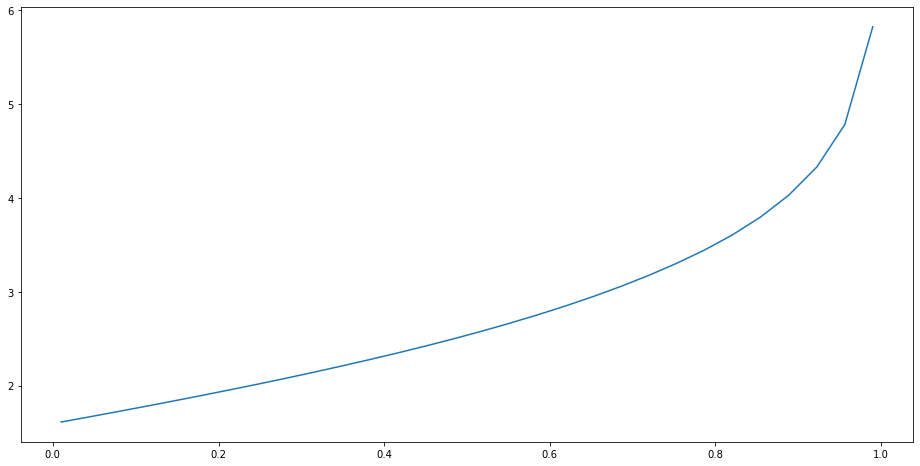

In [5]:
fig, ax = plt.subplots(figsize = (16,8))
fn_df.mean().plot(ax = ax)

Text(0.5, 1.0, 'Quantiles of the score function')

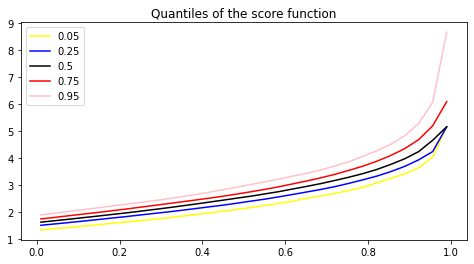

In [6]:
fig, ax = plt.subplots(figsize = (8,4))
pd.pivot_table(fn_df.quantile([.05,.25,.5,.75,.95]).reset_index(),
               columns = 'index').plot(ax = ax, color = ['Yellow','Blue','Black','Red','Pink'])

ax.legend([.05,.25,.5,.75,.95])
ax.set_title('Quantiles of the score function')